In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

In [3]:
from data_prep_functions import mnist_prep
from model_functions import *
from plotting_functions import nn_plot_acc, nn_plot_acc_many
import no_gpu
import reproducible

In [4]:
import time

In [5]:
X_train, X_test, y_train, y_test = mnist_prep()

In [6]:
layers = 5
neurons = [128, 128, 64, 32, 10]
n_cols = X_train.shape[1]
batch_size = 1000       # X_train.shape[0]
epochs = 20
optimizer = "sgd"

Epoch 1/20
60/60 [==============================] - 1s 14ms/step - loss: 2.2443 - accuracy: 0.2426 - val_loss: 2.0759 - val_accuracy: 0.4035
Epoch 2/20
60/60 [==============================] - 1s 12ms/step - loss: 1.8885 - accuracy: 0.5077 - val_loss: 1.6735 - val_accuracy: 0.5965
Epoch 3/20
60/60 [==============================] - 1s 13ms/step - loss: 1.4667 - accuracy: 0.6330 - val_loss: 1.2454 - val_accuracy: 0.6910
Epoch 4/20
60/60 [==============================] - 1s 13ms/step - loss: 1.0923 - accuracy: 0.7233 - val_loss: 0.9249 - val_accuracy: 0.7719
Epoch 5/20
60/60 [==============================] - 1s 11ms/step - loss: 0.8345 - accuracy: 0.7903 - val_loss: 0.7245 - val_accuracy: 0.8201
Epoch 6/20
60/60 [==============================] - 1s 13ms/step - loss: 0.6717 - accuracy: 0.8283 - val_loss: 0.6000 - val_accuracy: 0.8497
Epoch 7/20
60/60 [==============================] - 1s 11ms/step - loss: 0.5676 - accuracy: 0.8506 - val_loss: 0.5209 - val_accuracy: 0.8651
Epoch 8/20
60

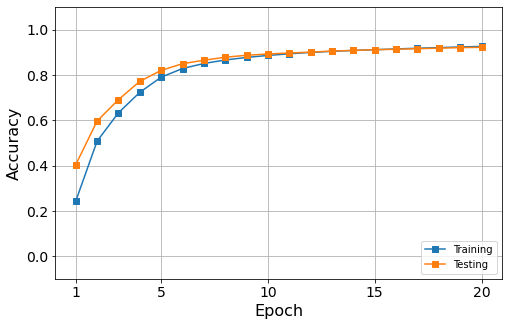

In [7]:
model = nn_model_structure(layers = layers,
                           neurons = neurons,
                           n_cols = n_cols)
model = nn_model_compile(model,
                         optimizer = optimizer)
start_time = time.time()
model = nn_model_fit(model,
                     X_train = X_train,
                     y_train = y_train,
                     X_val = X_test,
                     y_val = y_test,
                     batch_size = batch_size,
                     epochs = epochs)
end_time = time.time()
print("Overall calculation took {} seconds.".format(end_time - start_time))
model.summary()
nn_plot_acc(model,
            mean_comparison = None,
            start_epoch = 1,
            save = None)#"../img/mnist/mnist_{}_E{}_B{}.png".format(optimizer, epochs, batch_size))
#nn_save(model,
#        "../models/mnist/mnist_{}_E{}_B{}.h5".format(optimizer, epochs, batch_size))